In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "Unfallbeteiligte.csv"
table_involved = pd.read_csv(file, sep=';', 
                    skip_blank_lines=True,
                    header=[7, 8, 9],
                    skiprows=[10],
                    encoding='ISO-8859-1',
                    engine='python',
                    skipfooter=3)
table_involved.rename(columns={'Unnamed: 0_level_0': ' ', 
                      'Unnamed: 1_level_0': ' ', 
                      'Unnamed: 2_level_0': ' ',
                      'Unnamed: 3_level_0': ' '}, inplace=True)
table_involved

\
     Kategorie                                          
          Jahr                               Fahrzeug   
0         2008  Kraftrad mit Versicherungskennzeichen   
1         2008  Kraftrad mit Versicherungskennzeichen   
2         2008  Kraftrad mit Versicherungskennzeichen   
3         2008  Kraftrad mit Versicherungskennzeichen   
4         2008  Kraftrad mit Versicherungskennzeichen   
...        ...                                    ...   
3635      2020                              Insgesamt   
3636      2020                              Insgesamt   
3637      2020                              Insgesamt   
3638      2020                              Insgesamt   
3639      2020                              Insgesamt   

                                                    \
                                                     
                                   Unfallkategorie   
0                      Unfälle mit Personenschaden   
1                      Unfälle mit Personenschaden   
2                      Unfälle mit Personenschaden   
3                      Unfälle mit Personenschaden   
4     Schwerwiegende Unfälle mit Sachschaden i.e.S   
...                                            ...   
3635                    Übrige Sachschadensunfälle   
3636                                     Insgesamt   
3637                                     Insgesamt   
3638                                     Insgesamt   
3639                                     Insgesamt   

                                          männlich  \
                                    unter 15 Jahre   
                         Ortslage Unfallbeteiligte   
0                       innerorts               57   
1     außerorts (ohne Autobahnen)               12   
2                  auf Autobahnen                -   
3                       Insgesamt               69   
4                       innerorts                9   
...                           ...              ...   
3635                    Insgesamt                -   
3636                    innerorts                -   
3637  außerorts (ohne Autobahnen)                -   
3638               auf Autobahnen                -   
3639                    Insgesamt                -   

                                                         \
                                  15 bis unter 18 Jahre   
     Hauptverursacher des Unfalls      Unfallbeteiligte   
0                              50                  3831   
1                               9                   926   
2                               -                     -   
3                              59                  4757   
4                               8                   264   
...                           ...                   ...   
3635                            -                     -   
3636                         5267                     -   
3637                          481                     -   
3638                            -                     -   
3639                         5748                     -   

                                                         \
                                  18 bis unter 21 Jahre   
     Hauptverursacher des Unfalls      Unfallbeteiligte   
0                            2208                  1570   
1                             536                   314   
2                               -                     1   
3                            2744                  1885   
4                             166                    73   
...                           ...                   ...   
3635                            -                     -   
3636                         4209                     -   
3637                         1837                     -   
3638                           57                     -   
3639                         6103                     -   

                                   ...             Insgesamt  \
                        

In [3]:
accident_cat = table_involved[' ']['Kategorie']['Unfallkategorie'].unique() # categories of accidents

In [4]:
# import datetime
years =table_involved[' ']['Kategorie']['Jahr'].unique()

accident = table_involved.loc[(table_involved[' ','Kategorie','Fahrzeug'] == 'Insgesamt')
                          & (table_involved[' ','Kategorie','Unfallkategorie'] == 'Insgesamt') 
                          & (table_involved[' ','Kategorie','Ortslage'] == 'Insgesamt')]
main_responsibles = accident.loc[:, ('Insgesamt', (slice(None)),'Hauptverursacher des Unfalls')]
main_responsibles

Insgesamt                               \
                   unter 15 Jahre        15 bis unter 18 Jahre   
     Hauptverursacher des Unfalls Hauptverursacher des Unfalls   
279                          9484                        10362   
559                          9102                         9281   
839                          7949                         8083   
1119                         8961                         8417   
1399                         8109                         7901   
1679                         7666                         7443   
1959                         7724                         8350   
2239                         7467                         8310   
2519                         7630                         8135   
2799                         8073                         8026   
3079                         8251                         8534   
3359                         8089                         8393   
3639                         7927                         8053   

                                                                \
            18 bis unter 21 Jahre        21 bis unter 25 Jahre   
     Hauptverursacher des Unfalls Hauptverursacher des Unfalls   
279                         47523                        44069   
559                         46481                        43414   
839                         41979                        42028   
1119                        39977                        41650   
1399                        37940                        41320   
1679                        33869                        38882   
1959                        32509                        36691   
2239                        32062                        35037   
2519                        32732                        35039   
2799                        31589                        33590   
3079                        29164                        32923   
3359                        29220                        32130   
3639                        24592                        27822   

                                                                \
            25 bis unter 35 Jahre        35 bis unter 45 Jahre   
     Hauptverursacher des Unfalls Hauptverursacher des Unfalls   
279                         72263                        74819   
559                         70045                        68737   
839                         67791                        63792   
1119                        67825                        61524   
1399                        68789                        58810   
1679                        68079                        56245   
1959                        68223                        54606   
2239                        69624                        54253   
2519                        71095                        54972   
2799                        70383                        54538   
3079                        69368                        55119   
3359                        67373                        53910   
3639                        57261                        46957   

                                                                \
            45 bis unter 55 Jahre        55 bis unter 65 Jahre   
     Hauptverursacher des Unfalls Hauptverursacher des Unfalls   
279                         64752                        38857   
559                         64651                        38254   
839                         63862                        37810   
1119                        66197                        41300   
1399                        66105                        41496   
1679                        65715                        42413   
1959                        65819                        44236   
2239                        65283                        45675   
2519                        64543                        47484   
2799                        63023                        4929

In [5]:
age_groups = list(main_responsibles.columns.get_level_values(1))[:-2]
# age_groups
main_responsibles.columns.get_level_values(1)

Index(['unter 15 Jahre', '15 bis unter 18 Jahre', '18 bis unter 21 Jahre',
       '21 bis unter 25 Jahre', '25 bis unter 35 Jahre',
       '35 bis unter 45 Jahre', '45 bis unter 55 Jahre',
       '55 bis unter 65 Jahre', '65 bis unter 75 Jahre', '75 Jahre und mehr',
       'Alter unbekannt', 'Insgesamt'],
      dtype='object')

In [6]:
total_resp = main_responsibles['Insgesamt', 'Insgesamt', 'Hauptverursacher des Unfalls'].astype(int) - main_responsibles['Insgesamt', 'Alter unbekannt', 'Hauptverursacher des Unfalls'].astype(int)
total_resp

279     408268
559     396882
839     376463
1119    383477
1399    377731
1679    367365
1959    367590
2239    369044
2519    374853
2799    372210
3079    373189
3359    365252
3639    318686
dtype: int32

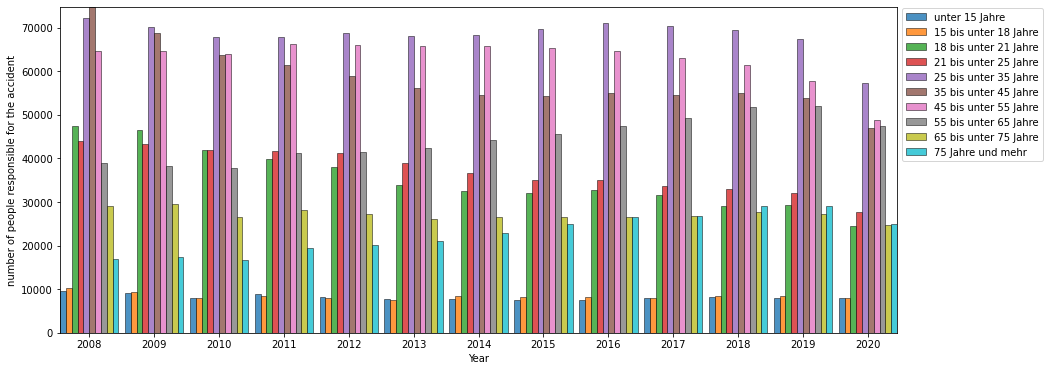

In [7]:
total_v = []
w = 0.09
r = -0.405
plt.figure(figsize=(15, 6))
for i, groups in enumerate(age_groups):
    
    amount_main_responsibles = main_responsibles['Insgesamt', groups, 'Hauptverursacher des Unfalls'].astype(int)
    total = amount_main_responsibles # (amount_main_responsibles-insgesamt.min())/(insgesamt.max()-insgesamt.min())
    total = total.values # / insgesamt.values
    
    plt.bar(years+r, total, width=w, align='center', label=groups, alpha=0.8, edgecolor='black', linewidth=0.6)
    r += w

plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('number of people responsible for the accident')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.01))
plt.autoscale(tight=True)
# plt.savefig("./imgs/main_respon_age_groups.pdf", bbox_inches='tight') # save figure as pdf
plt.show()

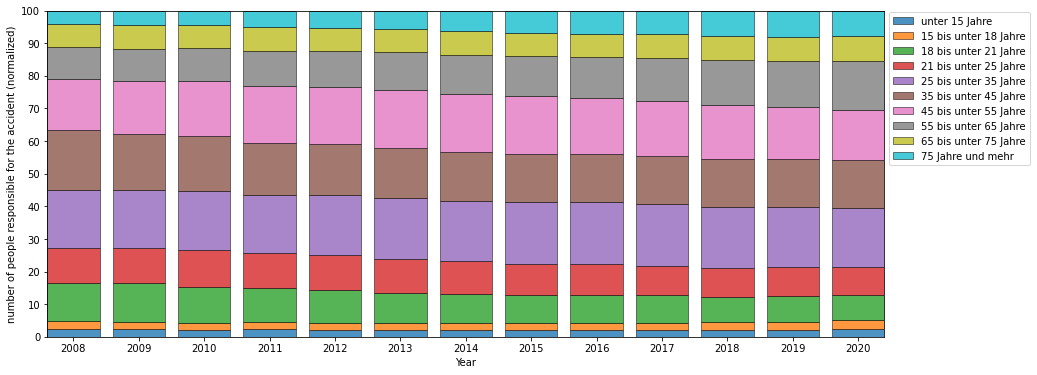

In [8]:
v = []
plt.figure(figsize=(15, 6))
for i, group in enumerate(age_groups):
    
    amount_main_responsibles = main_responsibles['Insgesamt', group, 'Hauptverursacher des Unfalls'].astype(int)
    total = (amount_main_responsibles / total_resp)*100# (amount_main_responsibles-total_resp.min())/(total_resp.max()-total_resp.min())
    total = total.values
    
    plt.bar(years, total, width=0.8, bottom=sum(v), label=group, alpha=0.8, edgecolor='black', linewidth=0.6)
    v.append(total)

plt.xticks(years)
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('Year')
plt.ylabel('number of people responsible for the accident (normalized)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.01))
plt.autoscale(tight=True)
# plt.savefig("./imgs/distr_age_groups.pdf", bbox_inches='tight') # save figure as pdf
plt.show()